In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score
import pandas as pd

In [2]:
# reading dataset from csv
stat = 'abnormal normal'.split()
data_origin = pd.read_csv('data.csv')
data = data_origin.drop(['filename'],axis=1)
data.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.498098,0.010669,1355.627582,1632.530756,2984.921626,0.057413,-357.065765,169.752792,-46.861694,67.454842,...,-6.062041,7.387231,-9.862085,9.058959,-7.534760,6.535229,-7.786106,0.841553,-5.342541,abnormal
1,0.547494,0.005378,2092.622402,1828.059500,4161.029209,0.138394,-377.315643,148.194016,-77.071838,70.391685,...,-6.725280,8.314228,-12.819753,10.248579,-13.006725,10.588124,-9.434364,8.421089,-1.956536,abnormal
2,0.199319,0.010700,1204.431156,1604.841989,2387.287807,0.043510,-406.926331,171.354568,-22.173464,48.847950,...,-14.506110,-4.364563,-16.434780,5.844230,-15.634045,10.232363,-0.303717,11.974640,2.435613,abnormal
3,0.630616,0.009863,1470.761577,1672.928265,3238.448863,0.070529,-352.411194,169.718460,-56.841694,66.465225,...,-2.550473,11.814772,-10.915584,6.584901,-11.403391,8.936230,-5.264018,7.075547,-4.117052,abnormal
4,0.334657,0.009123,1375.252521,1677.441716,2785.252377,0.070988,-375.983185,176.464676,-42.045616,51.753513,...,4.838639,16.043678,-7.186187,12.683148,-15.059711,9.484856,-8.006330,9.391084,-2.548033,abnormal


In [3]:
sound_list = data.iloc[:, -1]
encoder = LabelEncoder()
y_origin = encoder.fit_transform(sound_list)
y = [1 if e == 0 else 0 for e in y_origin]
y = np.array(y)

In [4]:
# normalizing
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

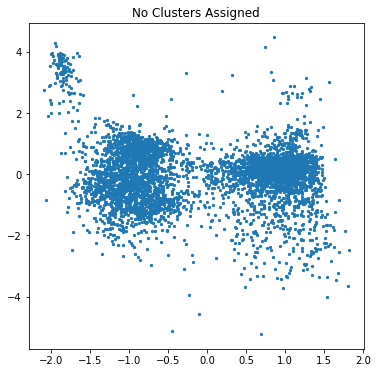

In [5]:
# Plot the random blub data
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.title(f"No Cluster s Assigned")
random_state = 42
clusters = 21

In [6]:
# Calculating the inertia and silhouette_score¶
inertia = []
sil = []
# changing the number of clusters 
for k in range(2, clusters):
    
    km = KMeans(n_clusters=k, random_state=random_state)
    km.fit(X)
    y_pred = km.predict(X)
    
    inertia.append((k, km.inertia_))
    sil.append((k, silhouette_score(X, y_pred)))

Text(0.5, 1.0, 'Silhouetter Score Curve')

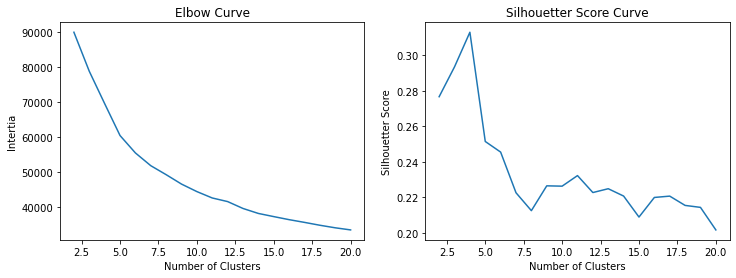

In [7]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
# Plotting Elbow Curve
x_iner = [x[0] for x in inertia]
y_iner  = [x[1] for x in inertia]
ax[0].plot(x_iner, y_iner)
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Intertia')
ax[0].set_title('Elbow Curve')
# Plotting Silhouetter Score
x_sil = [x[0] for x in sil]
y_sil  = [x[1] for x in sil]
ax[1].plot(x_sil, y_sil)
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouetter Score')
ax[1].set_title('Silhouetter Score Curve')

In [8]:
max_value = max(y_sil)
max_pos = y_sil.index(max_value) + 2
print('Maximum Value:', max_value, "At Cluster Number:", max_pos)

Maximum Value: 0.3130784313823738 At Cluster Number: 4


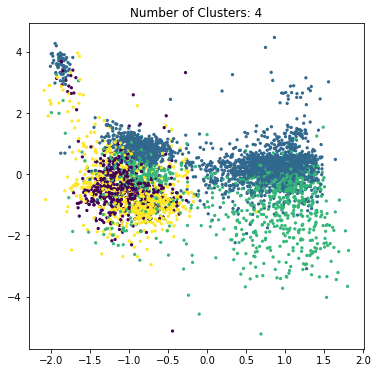

In [9]:
plt.figure(figsize=(6, 6))
    
# Predicting the clusters
y_pred = KMeans(n_clusters=max_pos, random_state=random_state).fit_predict(X)
# plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=5)
plt.title(f"Number of Clusters: {max_pos}")
plt.show();